In [10]:
import os
os.getcwd()

'C:\\Users\\trist\\PycharmProjects\\Political_debate_summary\\tools'

In [1]:
with open('C://Users//trist//PycharmProjects//Political_debate_summary//TOKENS//huggingFaceAccessToken.txt', 'r') as file:
    token = file.read().rstrip()

In [34]:
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization@2.1",
                                    use_auth_token=token)


# apply the pipeline to an audio file
diarization = pipeline("audio_splited//test_dia_4_voix.wav")

# dump the diarization output to disk using RTTM format
with open("audio_4voix.rttm", "w") as rttm:
    diarization.write_rttm(rttm)

In [35]:
diarization = pipeline("audio_splited//test_dia_4_voix.wav", num_speakers=4)

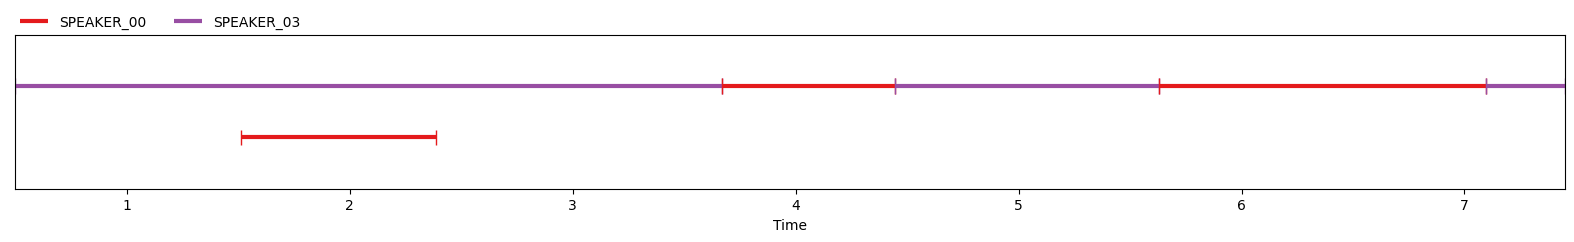

In [36]:
diarization

In [37]:
print(diarization)

[ 00:00:00.497 -->  00:00:03.670] H SPEAKER_03
[ 00:00:01.510 -->  00:00:02.387] A SPEAKER_00
[ 00:00:03.670 -->  00:00:04.446] B SPEAKER_00
[ 00:00:04.446 -->  00:00:05.627] I SPEAKER_03
[ 00:00:05.627 -->  00:00:07.095] C SPEAKER_00
[ 00:00:07.095 -->  00:00:07.619] J SPEAKER_03
[ 00:00:07.619 -->  00:00:07.990] G SPEAKER_02
[ 00:00:08.091 -->  00:00:10.200] D SPEAKER_00
[ 00:00:12.344 -->  00:00:14.453] F SPEAKER_01
[ 00:00:13.896 -->  00:00:14.453] E SPEAKER_00


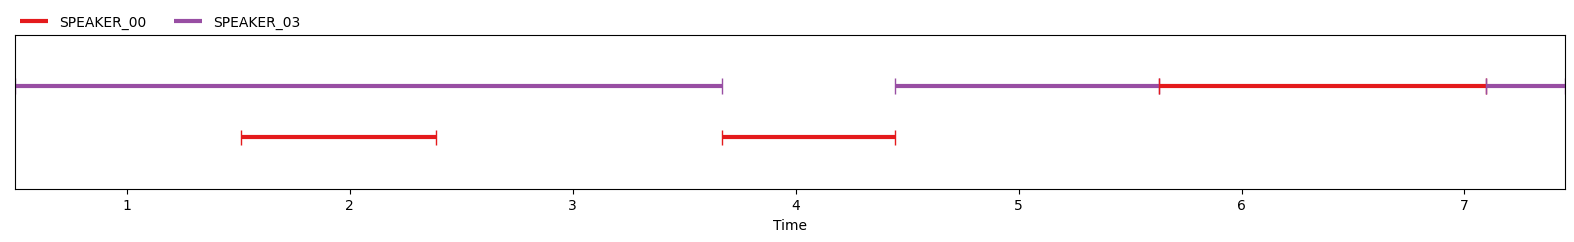

In [38]:
# load groundtruth
from pyannote.database.util import load_rttm
_, groundtruth = load_rttm('audio_4voix.rttm').popitem()
groundtruth

In [28]:
# load groundtruth
from pyannote.database.util import load_rttm
_, groundtruth = load_rttm('audio_4voix.rttm').popitem()
groundtruth = str(groundtruth)
print(groundtruth)
import base64
data = groundtruth.replace(' ', '+')
imgdata = base64.b64decode(data)
filename = 'some_image.jpg'  # I assume you have a way of picking unique filenames
with open(filename, 'wb') as f:
        f.write(imgdata)

[ 00:00:00.498 -->  00:00:02.709] 0 SPEAKER_02
[ 00:00:04.210 -->  00:00:06.708] 1 SPEAKER_01
[ 00:00:08.530 -->  00:00:12.344] 2 SPEAKER_01
[ 00:00:13.255 -->  00:00:15.162] 3 SPEAKER_01
[ 00:00:15.905 -->  00:00:17.002] 4 SPEAKER_01
[ 00:00:17.626 -->  00:00:20.630] 5 SPEAKER_01
[ 00:00:20.630 -->  00:00:20.782] 6 SPEAKER_00
[ 00:00:21.389 -->  00:00:25.068] 7 SPEAKER_00
[ 00:00:25.270 -->  00:00:27.582] 8 SPEAKER_02
[ 00:00:30.046 -->  00:00:32.459] 9 SPEAKER_02


In [27]:
groundtruth


'[ 00:00:00.498 -->  00:00:02.709] 0 SPEAKER_02\n[ 00:00:04.210 -->  00:00:06.708] 1 SPEAKER_01\n[ 00:00:08.530 -->  00:00:12.344] 2 SPEAKER_01\n[ 00:00:13.255 -->  00:00:15.162] 3 SPEAKER_01\n[ 00:00:15.905 -->  00:00:17.002] 4 SPEAKER_01\n[ 00:00:17.626 -->  00:00:20.630] 5 SPEAKER_01\n[ 00:00:20.630 -->  00:00:20.782] 6 SPEAKER_00\n[ 00:00:21.389 -->  00:00:25.068] 7 SPEAKER_00\n[ 00:00:25.270 -->  00:00:27.582] 8 SPEAKER_02\n[ 00:00:30.046 -->  00:00:32.459] 9 SPEAKER_02'

In [10]:
# 5. print the result
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f"start={turn.start:.1f}s stop={turn.end:.1f}s speaker_{speaker}")

start=0.5s stop=2.7s speaker_SPEAKER_02
start=4.2s stop=6.7s speaker_SPEAKER_01
start=8.5s stop=12.3s speaker_SPEAKER_01
start=13.3s stop=15.2s speaker_SPEAKER_01
start=15.9s stop=17.0s speaker_SPEAKER_01
start=17.6s stop=20.6s speaker_SPEAKER_01
start=20.6s stop=20.8s speaker_SPEAKER_00
start=21.4s stop=25.1s speaker_SPEAKER_00
start=25.3s stop=27.6s speaker_SPEAKER_02
start=30.0s stop=32.5s speaker_SPEAKER_02
